In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import skimage
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
spotify_data = pd.read_csv('SpotifyFeatures.csv')
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [22]:
spotify_data.shape

(232725, 18)

In [27]:
spotify_data.isnull()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
spotify_data.drop_duplicates

<bound method DataFrame.drop_duplicates of         genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  

In [5]:
spotify_features_df = spotify_data
genre_OHE = pd.get_dummies(spotify_features_df.genre)
key_OHE = pd.get_dummies(spotify_features_df.key)


In [6]:
scaled_features = MinMaxScaler().fit_transform([
    spotify_features_df['acousticness'].values,
    spotify_features_df['danceability'].values,
    spotify_features_df['duration_ms'].values,
    spotify_features_df['energy'].values,
    spotify_features_df['instrumentalness'].values,
    spotify_features_df['liveness'].values,
    spotify_features_df['loudness'].values,
    spotify_features_df['speechiness'].values,
    spotify_features_df['tempo'].values,
    spotify_features_df['valence'].values,
])


In [7]:
spotify_features_df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']] = scaled_features.T


In [8]:
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [9]:
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)


In [10]:
spotify_features_df.head()


,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,0,0,1,0,0,0,0,0,0,0
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,0,0,0,0,0,0,0,1,0,0
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,0,1,0,0,0,0,0,0,0,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,0,0,1,0,0,0,0,0,0,0
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,0,0,0,0,0,0,1,0,0,0


In [11]:
client_id = '3e247d46c377496aa7eaff1b34cb38b1'
client_secret = '0e80278bb27146c5a82ea1ee3a1e489a'


In [29]:
#Fetching the playlist
scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope,
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri='https://example.com/callback/'
)
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)


{'Your Top Songs 2020': '37i9dQZF1EM8x9HvVNFJOk', 'Alter9': '3wqYXwqlmVMpKKs9VQfsa5', 'Chill': '6QOZp3hBBN3HA0U89A8k4G'}


In [30]:
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist


playlist_df = generate_playlist_df(
    'Alter9', playlist_dic, spotify_data)


In [31]:
playlist_df.head()


,artist,track_name,track_id,url,date_added
38,Conan Gray,Idle Town,0cXRafInOlc1QH519RXltN,https://i.scdn.co/image/ab67616d00001e021da538...,2020-06-22 11:04:59+00:00
27,HONNE,Me & You ◑,1ITJTMrS4cx8zdlI7DdSoo,https://i.scdn.co/image/ab67616d00001e02210933...,2020-06-22 11:00:55+00:00
22,Melanie Martinez,Play Date,4DpNNXFMMxQEKl7r0ykkWA,https://i.scdn.co/image/ab67616d00001e02389971...,2020-06-22 11:00:01+00:00
18,Phum Viphurit,Lover Boy,2rd4FH1cSaWGc0ZiUaMbX9,https://i.scdn.co/image/ab67616d00001e02ebefdc...,2020-06-22 10:59:20+00:00
17,Dansu,Don't You Give Up,68xBP3GnZuYEDlN4usyp4G,https://i.scdn.co/image/ab67616d00001e02243947...,2020-06-22 10:59:06+00:00


In [32]:
from skimage import io
import matplotlib.pyplot as plt


def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15, int(0.625 * len(temp))), facecolor='#8cfc03')
    columns = 5

    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s = ''
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(
            ' ')[:4]), fontsize=10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()


C:\Users\anmol\AppData\Local\Temp/ipykernel_15976/2225134054.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


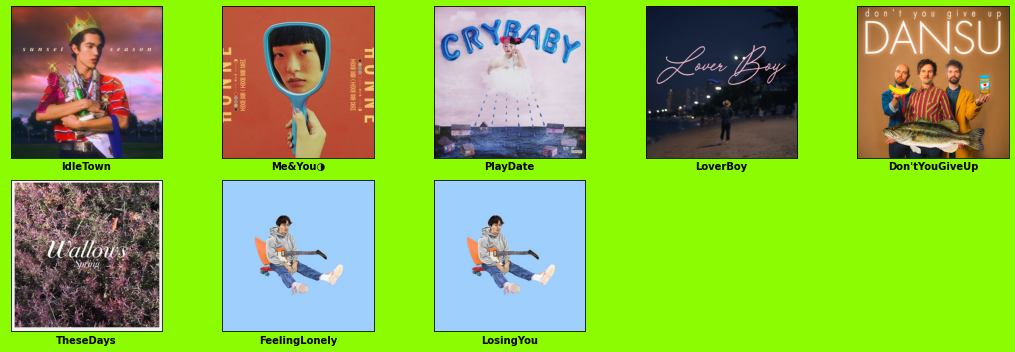

In [33]:
visualize_cover_art(playlist_df)


In [34]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):

    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(
        playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(
        playlist_df[['track_id', 'date_added']], on='track_id', how='inner')

    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(
        playlist_df['track_id'].values)]

    playlist_feature_set = spotify_features_playlist.sort_values(
        'date_added', ascending=False)

    most_recent_date = playlist_feature_set.iloc[0, -1]

    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix, 'days_from_recent'] = int(
            (most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)

    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(
        lambda x: weight_factor ** (-x))

    playlist_feature_set_weighted = playlist_feature_set.copy()

    playlist_feature_set_weighted.update(
        playlist_feature_set_weighted.iloc[:, :-3].mul(playlist_feature_set_weighted.weight.astype(int), 0))

    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]

    return playlist_feature_set_weighted_final.sum(axis=0), spotify_features_nonplaylist


In [35]:
playlist_vector, nonplaylist_df = generate_playlist_vector(
    spotify_features_df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.head())


(50,)
                 track_id  acousticness  danceability  duration_ms    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.000025      0.000022          1.0  0.000028   
1  0BjC1NfoEOOusryehmNudP      0.000042      0.000045          1.0  0.000046   
2  0CoSDzoNIKCRs124s9uTVy      0.000087      0.000085          1.0  0.000082   
3  0Gc6TVm52BwZD07Ki6tIvf      0.000084      0.000081          1.0  0.000082   
4  0IuslXpMROHdEPvSl1fTQK      0.000267      0.000260          1.0  0.000259   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  B  C  C#  \
0          0.000018  0.000022       0.0     0.000019  0.001699  ...  0  0   1   
1          0.000040  0.000042       0.0     0.000041  0.001307  ...  0  0   0   
2          0.000082  0.000082       0.0     0.000082  0.000666  ...  0  1   0   
3          0.000080  0.000081       0.0     0.000080  0.001207  ...  0  0   1   
4          0.000257  0.000258       0.0     0.000256  0.001957  ...  0  0   0   

   D  D#  E  F  F#  G  G# 

In [36]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(
        nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(
        ['track_id'], axis=1).values, playlist_vector.drop(labels='track_id').values.reshape(1, -1))[:, 0]
    non_playlist_top15 = non_playlist.sort_values(
        'sim', ascending=False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(
        lambda x: sp.track(x)['album']['images'][1]['url'])

    return non_playlist_top15


In [37]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)
top15.head()


C:\Users\anmol\AppData\Local\Temp/ipykernel_15976/1848989513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
140813,Indie,Gregory Alan Isakov,Southern Star,6YXbSjabsKQ1pNvj6zcJ9V,54,0.000082,0.000080,1.0,0.000079,0.000076,C,0.000077,0.0,Major,0.000077,0.001029,3/4,0.000078,0.77829,https://i.scdn.co/image/ab67616d00001e0222c614...
145201,Indie,The Growlers,California,3JgCyIcJPmBVfcgyedU9FV,44,0.000076,0.000076,1.0,0.000075,0.000071,C,0.000073,0.0,Major,0.000072,0.000987,4/4,0.000075,0.77829,https://i.scdn.co/image/ab67616d00001e0286db8a...
140877,Indie,Omar Apollo,Ignorin,0zxtATAx8TrZG0034YBZD5,52,0.000070,0.000076,1.0,0.000074,0.000071,C,0.000071,0.0,Major,0.000071,0.001048,4/4,0.000076,0.77829,https://i.scdn.co/image/ab67616d00001e02f6bae3...
109621,Pop,Sheck Wes,Live Sheck Wes,1dhO5lyN2Otv4qR0xWQXH7,74,0.000053,0.000058,1.0,0.000057,0.000053,C,0.000054,0.0,Major,0.000055,0.001003,4/4,0.000057,0.77829,https://i.scdn.co/image/ab67616d00001e0259cd47...
150254,Pop,YBN Cordae,Alaska,5w5vNXhfgWVZRYe7tSIbfj,64,0.000065,0.000071,1.0,0.000068,0.000064,C,0.000065,0.0,Minor,0.000068,0.001061,4/4,0.000070,0.77829,https://i.scdn.co/image/ab67616d00001e02cdd6b4...


C:\Users\anmol\AppData\Local\Temp/ipykernel_15976/2225134054.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


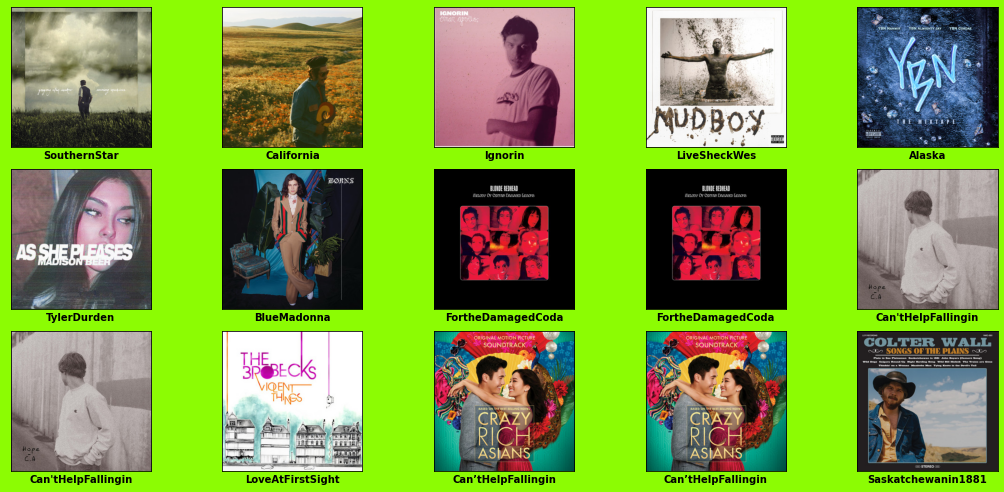

In [38]:
visualize_cover_art(top15)